# Support Vector Machines (SVM) reference guide

In this project, we will explore the application of Support Vector Machines (SVM) for classification tasks. We will use Python libraries like pandas, NumPy, and Matplotlib for data manipulation and visualization, and Scikit-learn's `svm` module for implementing the SVM algorithm. 

Our goal is to understand how SVM can be used to classify data points and how different parameters affect the performance of the SVM classifier. Let's start by importing the necessary libraries and setting up our environment.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm

test_size = 200

import warnings
warnings.filterwarnings('ignore')


## Data Generation and Preparation

First, we need to generate synthetic data to train and test our SVM model. Here, we create two sets of data points: one centered around (1, 1) and another around (-1, 3), each following a normal distribution. These points will serve as two distinct classes for our SVM classifier.

We'll split the data into training and test sets, ensuring we have enough data to train our model effectively and test its performance accurately.



In [3]:
# Function to generate data with added random noise
def generate_data(mean, std_dev, size, noise_level=0.1):
    """
    Generates data points with a specified mean and standard deviation,
    and adds random noise.
    """
    return np.random.normal(mean, std_dev, size=size) + np.random.normal(0, noise_level, size=size)

# Generate data for two classes
mu_p = generate_data(1, 1, size=(1000+test_size, 2))
mu_p_train = mu_p[:1000, :]
mu_p_test = mu_p[1000:, :]

mu_n = generate_data(-1, 3, size=(1000+test_size, 2))
mu_n_train = mu_n[:1000, :]
mu_n_test = mu_n[1000:, :]

Continuing with data preparation, we now generate another set of points for the negative class, following a normal distribution centered around (-1, 3). It's crucial to have balanced data for both classes to ensure our model learns to distinguish them effectively.

In [4]:
full_p = np.full((1000), 1)
df_p = pd.DataFrame(mu_p_train, columns=['x0','x1'])

full_n = np.full((1000), -1)
df_n = pd.DataFrame(mu_n_train, columns=['x0','x1'])

x_df = pd.concat([df_p,df_n])
y_df = pd.concat([pd.DataFrame(full_p, columns=['y0']),pd.DataFrame(full_n, columns=['y0'])])

## Creating DataFrames for SVM

After generating the data points, we'll create Pandas DataFrames to hold our features (x0 and x1) and labels (y0). We use `pd.concat` to merge positive and negative class data, forming our complete dataset for training the SVM model. This step is vital for structuring our data correctly for the SVM algorithm.


In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Visualizing SVM Decision Boundaries

To understand how our SVM model makes decisions, we'll define a function `plot_svc_decision_function`. This function will plot the decision boundary, margins, and support vectors on a 2D plot. Visualizing these elements is crucial to comprehend the behavior of the SVM classifier in a two-dimensional feature space.


## Experimenting with Different Gamma Values

The gamma parameter defines how far the influence of a single training example reaches. Low values mean 'far' and high values mean 'close'. We will experiment with various gamma values (`{0.01, 0.1, 1, 10, 100, 1000}`) to observe how they affect the classifier's decision boundary.

After training our SVM model with each gamma value, we'll visualize the decision boundaries and calculate the accuracy of the model on the test data.


gamma in {0.01,0.1,1,10,100,1000\}
SVC(C=1, gamma=0.01)
Support Vectors: 1582
Accuracy: 0.86


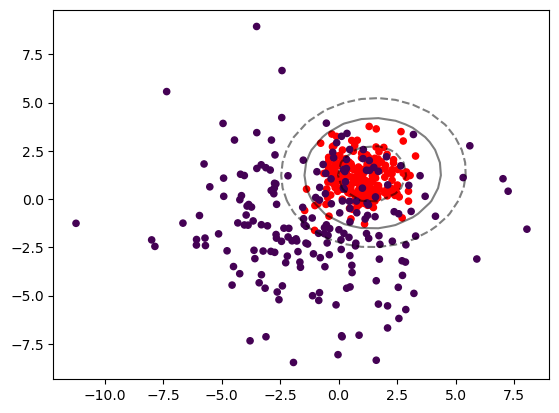

SVC(C=1, gamma=0.1)
Support Vectors: 1264
Accuracy: 0.8475


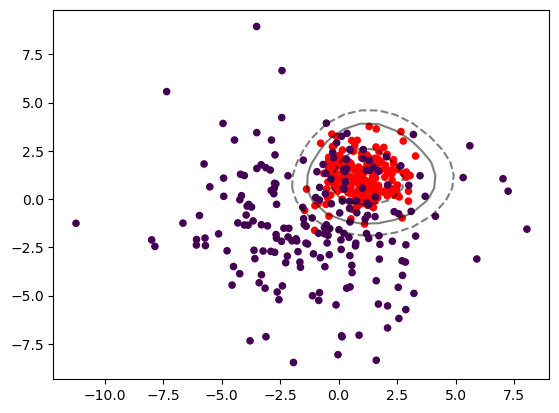

SVC(C=1, gamma=1)
Support Vectors: 1550
Accuracy: 0.8525


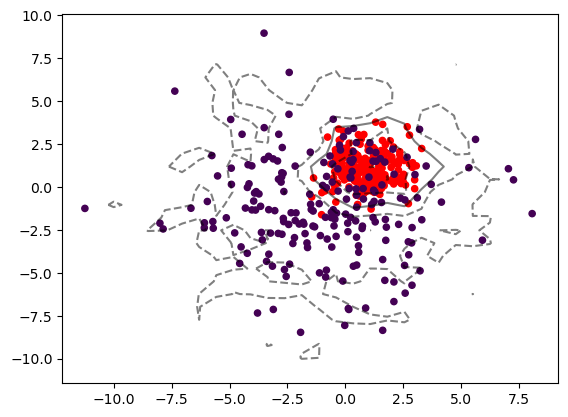

SVC(C=1, gamma=10)
Support Vectors: 2674
Accuracy: 0.845


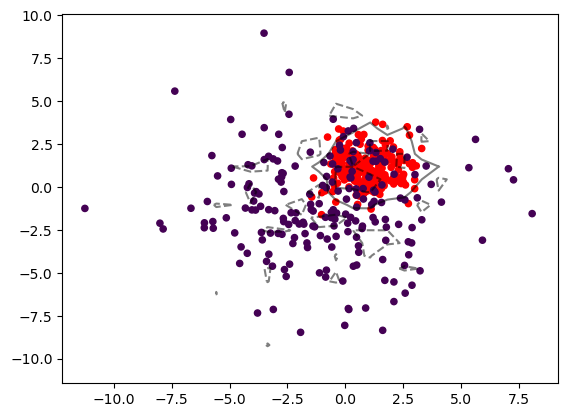

SVC(C=1, gamma=100)
Support Vectors: 3646
Accuracy: 0.8125


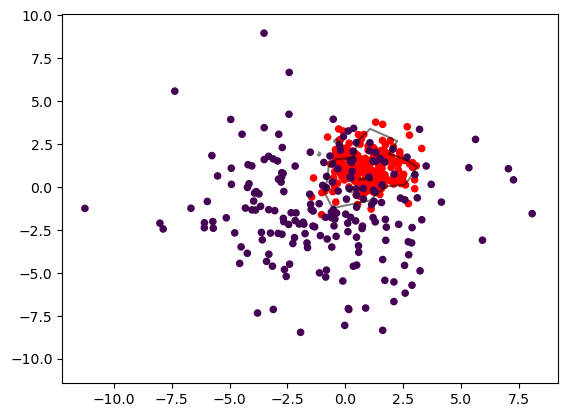

SVC(C=1, gamma=1000)
Support Vectors: 3990
Accuracy: 0.685


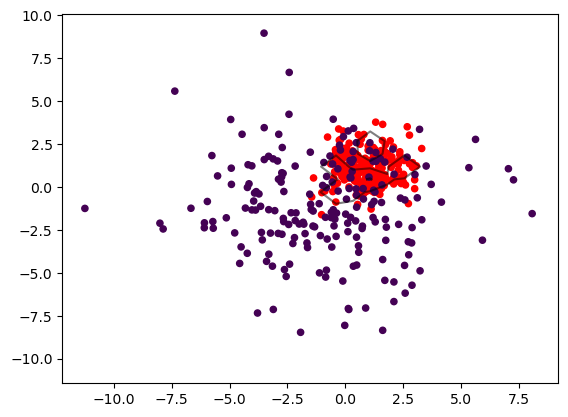

In [6]:
print("gamma in {0.01,0.1,1,10,100,1000\}")
for g in (0.01,0.1,1,10,100,1000):
    rbf = svm.SVC(C=1,  kernel='rbf', gamma=g)
    rbf.fit(x_df, y_df.values.ravel())
    print(rbf)
    test_p = rbf.predict(mu_p_test)
    test_n = rbf.predict(mu_n_test)
    TP = np.count_nonzero(test_p == 1)
    TN = np.count_nonzero(test_n == -1)
    print("Support Vectors:",rbf.support_vectors_.size)
    print("Accuracy:",((TP+TN)/(test_size*2)))
    plt.scatter(mu_p_test[:, 0], mu_p_test[:, 1], c=np.full((test_size),  1), s=20, cmap='autumn')
    plt.scatter(mu_n_test[:, 0], mu_n_test[:, 1], c=np.full((test_size), -1), s=20, cmap='viridis')
    plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:, 1],s=30, lw=1, facecolors='none');
    plot_svc_decision_function(rbf)
    plt.show()

#### Tuning the Regularization Parameter 'C'

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. Higher C values will choose a smaller-margin hyperplane, leading to a more complex model that might overfit, while a lower C will choose a larger margin, possibly underfitting.

We'll experiment with different values of C (`{0.01, 0.1, 1, 10, 100, 1000}`) to see how it influences our SVM model's performance, particularly its ability to correctly classify test data.


C in {0.01,0.1,1,10,100,1000\}
SVC(C=0.01, gamma=1)
Support Vectors: 3544
Accuracy: 0.85


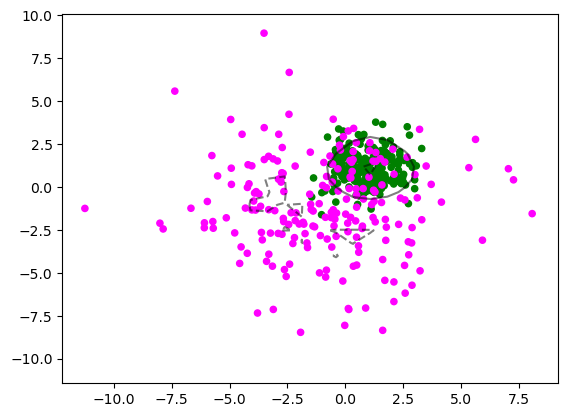

SVC(C=0.1, gamma=1)
Support Vectors: 1902
Accuracy: 0.84


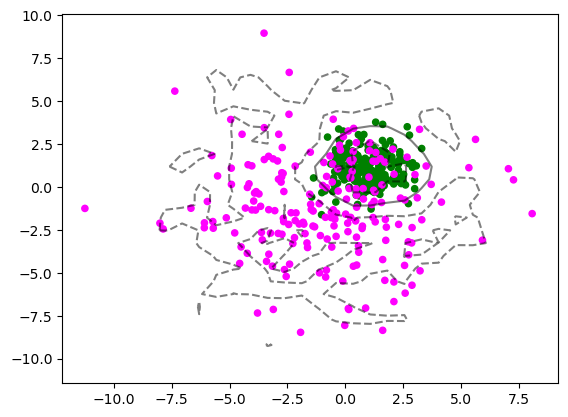

SVC(C=1, gamma=1)
Support Vectors: 1550
Accuracy: 0.8525


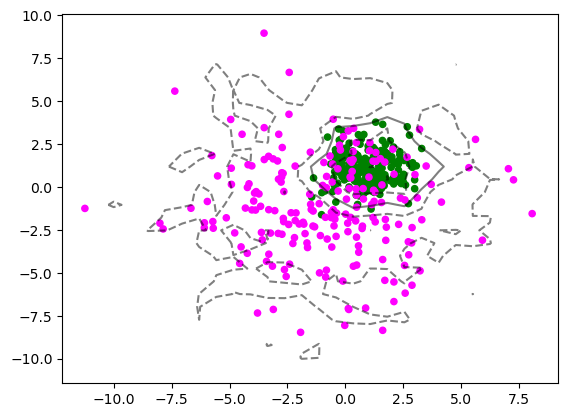

SVC(C=10, gamma=1)
Support Vectors: 1428
Accuracy: 0.8475


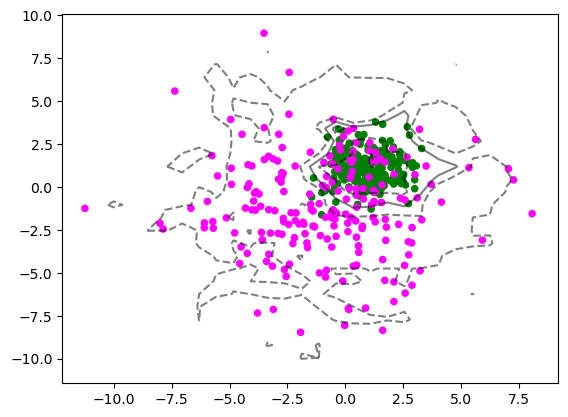

SVC(C=100, gamma=1)
Support Vectors: 1088
Accuracy: 0.8575


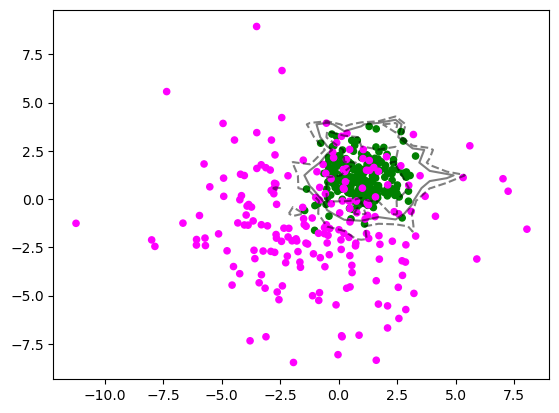

SVC(C=1000, gamma=1)
Support Vectors: 1090
Accuracy: 0.855


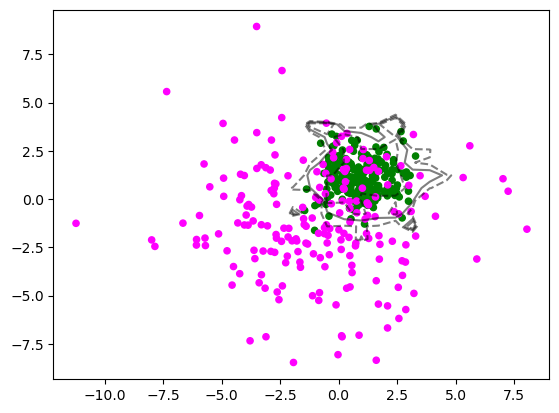

In [7]:
print("C in {0.01,0.1,1,10,100,1000\}")
for c in (0.01,0.1,1,10,100,1000):
    rbf = svm.SVC(C=c,  kernel='rbf', gamma=1)
    rbf.fit(x_df, y_df.values.ravel())
    print(rbf)
    test_p = rbf.predict(mu_p_test)
    test_n = rbf.predict(mu_n_test)
    TP = np.count_nonzero(test_p == 1)
    TN = np.count_nonzero(test_n == -1)
    print("Support Vectors:",rbf.support_vectors_.size)
    print("Accuracy:",((TP+TN)/(test_size*2)))
    plt.scatter(mu_p_test[:, 0], mu_p_test[:, 1], c=np.full((test_size),  1), s=20, cmap='ocean')
    plt.scatter(mu_n_test[:, 0], mu_n_test[:, 1], c=np.full((test_size), -1), s=20, cmap='spring')
    plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:, 1],s=30, lw=1, facecolors='none');
    plot_svc_decision_function(rbf)
    plt.show()

## Exploring SVM with a Linear Kernel

Finally, we explore the SVM classifier using a linear kernel. This is simpler than the RBF kernel and is useful for linearly separable data. We'll again experiment with different C values to understand their impact on a linear SVM model. The model's performance and the number of support vectors will be analyzed to draw insights about the linear kernel's behavior.


In [8]:
print("Linear kernel")
for c in (0.01,0.1,1,10,100,1000):
    rbf = svm.SVC(C=c,  kernel='linear')
    rbf.fit(x_df, y_df.values.ravel())
    print(rbf)
    test_p = rbf.predict(mu_p_test)
    test_n = rbf.predict(mu_n_test)
    TP = np.count_nonzero(test_p == 1)
    TN = np.count_nonzero(test_n == -1)
    print("Support Vectors:",rbf.support_vectors_.size)
    print("Accuracy:",((TP+TN)/(test_size*2)))

Linear kernel
SVC(C=0.01, kernel='linear')
Support Vectors: 2364
Accuracy: 0.815
SVC(C=0.1, kernel='linear')
Support Vectors: 2306
Accuracy: 0.815
SVC(C=1, kernel='linear')
Support Vectors: 2302
Accuracy: 0.815
SVC(C=10, kernel='linear')
Support Vectors: 2300
Accuracy: 0.815
SVC(C=100, kernel='linear')
Support Vectors: 2300
Accuracy: 0.815
SVC(C=1000, kernel='linear')
Support Vectors: 2300
Accuracy: 0.815


# Conclusion

In this project, we explored SVM classifiers using synthetic datasets. We experimented with different gamma and C values, and observed how these parameters impact the model's decision boundaries and accuracy. We also compared the RBF and linear kernels. These experiments provide valuable insights into SVM's behavior and its application in classification tasks.

The visualizations and analyses presented here can serve as a foundational understanding for those new to SVMs or for further exploration into more complex datasets and SVM applications.



# Room for Growth

This project provides a foundational exploration of Support Vector Machines (SVM) using synthetic data. However, there is ample scope for further development and analysis. Below are some suggested next steps to enhance and expand this project:

1. **Cross-Validation Implementation**: Incorporate cross-validation techniques to ensure the model's robustness and generalizability, reducing the likelihood of overfitting.

2. **Feature Engineering**: Experiment with different feature engineering techniques to improve model performance. This could include polynomial features, normalization, or dimensionality reduction methods like PCA.

3. **Hyperparameter Tuning**: Utilize advanced hyperparameter tuning methods, such as grid search or random search, to systematically explore a wide range of parameter combinations and optimize model performance.

4. **Real-world Dataset Application**: Apply the SVM model to real-world datasets from various domains (e.g., healthcare, finance, image recognition) to evaluate its performance in practical scenarios.

5. **Comparative Analysis with Other Models**: Compare SVM's performance with other classification algorithms like Decision Trees, Random Forest, and Neural Networks to understand its strengths and limitations in different contexts.

6. **Kernel Exploration**: Dive deeper into different types of SVM kernels (like polynomial or sigmoid) and study their impact on model performance, especially for non-linearly separable data.

7. **Performance Metrics Analysis**: Extend the evaluation metrics beyond accuracy to include precision, recall, F1-score, and ROC-AUC, providing a more comprehensive assessment of the model's performance.

8. **Handling Imbalanced Data**: Investigate techniques for dealing with imbalanced datasets, such as SMOTE or class weight adjustment, to improve model performance in such scenarios.

9. **Interpretability and Explainability**: Explore methods to make the SVM model more interpretable, such as using LIME or SHAP, to provide insights into how the model makes its predictions.

10. **Scalability and Optimization**: Research ways to scale the SVM model for large datasets, considering computational efficiency and memory usage, possibly through parallel processing or more efficient algorithms.

By pursuing these avenues, we can significantly enhance the capabilities of our SVM models and contribute to a deeper understanding of machine learning algorithms in various applications.



In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X_iris = iris.data.features 
y_iris = iris.data.targets 
  
X_iris

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y_iris['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
X_iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [13]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

Parameters:

SVC() is the model you're tuning.
param_grid contains the hyperparameters you're tuning for the SVM.
refit=True tells GridSearchCV to refit the best model on the entire dataset.
verbose=2 enables the function to output detailed information during the process.
cv=5 specifies 5-fold cross-validation.

In [14]:
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

In [15]:
grid_search.fit(X_iris, y_iris.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [16]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Score: 0.9800000000000001
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [17]:
scores = cross_val_score(best_estimator, X_iris, y_iris.values.ravel(), cv=5)

print("Cross-Validation Scores:", scores)
print("Average Score:", np.mean(scores))

Cross-Validation Scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Average Score: 0.9800000000000001


In [18]:

# Print the best model parameters
print("Best Model Parameters:")
print(best_estimator)

Best Model Parameters:
SVC(C=1, gamma=0.1)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

In [20]:
rbf = svm.SVC(C=1, kernel='rbf', gamma=0.1)
rbf.fit(X_train, y_train.values.ravel())
print(rbf)

SVC(C=1, gamma=0.1)


In [21]:
accuracy = rbf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [22]:
predictions = rbf.predict(X_test)
X_test_with_predictions = X_test.copy()
X_test_with_predictions['predicted_class'] = predictions
unique_classes = X_test_with_predictions['predicted_class'].unique()
separated_dfs = {cls: X_test_with_predictions[X_test_with_predictions['predicted_class'] == cls] for cls in unique_classes}

In [23]:
print(X_test.shape)
for cls, df in separated_dfs.items():
    print(f"Class: {cls}")
    print(df.shape)

(45, 4)
Class: Iris-versicolor
(13, 5)
Class: Iris-setosa
(19, 5)
Class: Iris-virginica
(13, 5)


In [24]:
rbf.support_vectors_.size

180

In [25]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit and transform the class labels in the test set
y_test_encoded = label_encoder.fit_transform(y_test)


In [26]:
label_encoder.inverse_transform([2])[0]

'Iris-virginica'

1
2
3


ValueError: y contains previously unseen labels: [3]

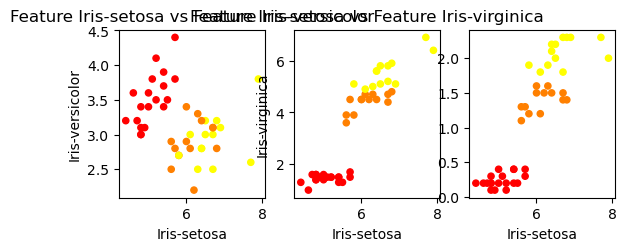

In [27]:
import matplotlib.pyplot as plt
from itertools import combinations

feature_combinations = combinations(range(4), 2)  # All pairwise combinations of 4 features

for i, (feature1, feature2) in enumerate(feature_combinations):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed

    # Scatter plot for each feature pair using encoded class labels for color
    plt.scatter(X_test.iloc[:, feature1], X_test.iloc[:, feature2], c=y_test_encoded, s=20, cmap='autumn')

    # Plotting support vectors
    sv_df = pd.DataFrame(rbf.support_vectors_, columns=X_test.columns)
    plt.scatter(sv_df.iloc[:, feature1], sv_df.iloc[:, feature2], s=30, lw=1, facecolors='none')
    
    plt.xlabel(label_encoder.inverse_transform([feature1])[0])
    # plt.xlabel(f'Feature {feature1}') 
    print(feature2)
    plt.ylabel(label_encoder.inverse_transform([feature2])[0])
    plt.title(f'Feature {label_encoder.inverse_transform([feature1])[0]} vs Feature {label_encoder.inverse_transform([feature2])[0]}')

plt.tight_layout()
plt.show()



In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn import svm

feature_combinations = combinations(range(4), 2)

for i, (feature1, feature2) in enumerate(feature_combinations):
    plt.subplot(2, 3, i + 1)

    # Selecting only the two features for training
    X_train_2D = X_train.iloc[:, [feature1, feature2]].to_numpy()
    X_test_2D = X_test.iloc[:, [feature1, feature2]].to_numpy()

    # Train the SVM model on these two features
    model = svm.SVC(C=1, kernel='rbf', gamma=0.1)
    model.fit(X_train_2D, y_train)

    # Scatter plot for each feature pair using encoded class labels for color
    plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_encoded, s=20, cmap='autumn')

    # Plot decision boundaries
    plot_svc_decision_function(model, ax=plt.gca())

    plt.xlabel(f'Feature {feature1}')
    plt.ylabel(f'Feature {feature2}')
    plt.title(f'Feature {feature1} vs Feature {feature2}')

plt.tight_layout()
plt.show()

